In [218]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [290]:
def compute_NPM(G, node, labels):
    '''
    Get an NPM value given a language and a colexification
    '''
    npm = 0
    p = dict(nx.shortest_path_length(G))
    for j in p[node]:
        if labels[j] == 1:
            npm += 1/4**p[j][node]
    return npm

In [291]:
def random_graph(n=50, d=0.3, bin=0.5):
    # n = 50
    # d = 0.2
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    # create a graph
    G = nx.Graph()
    # if the distance between two nodes is less than 0.2, add an edge
    for i in range(n):
            for j in range(i):
                if np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2) < d:
                    G.add_edge(i, j)
    
    # randomly generate binary labels for each node
    labels = np.random.binomial(1, bin, len(G.nodes))
    print(len(labels))
    # color the nodes according to the labels (1 = red, 0 = blue)
    color_map = []
    for node in G:
        if labels[node] == 1:
            color_map.append('blue')
        else:
            color_map.append('red')
    # draw the graph
    nx.draw(G, node_color = color_map, width = 0.1, node_size=30)
    # add title to the graph and show it
    plt.title(' N of nodes = {}\n distance treshlold = {}\n Binomial = {}'.format(n, d, bin))
    return G, x, y, labels, color_map

# draw the graph

Why does it fail sometimes?

100


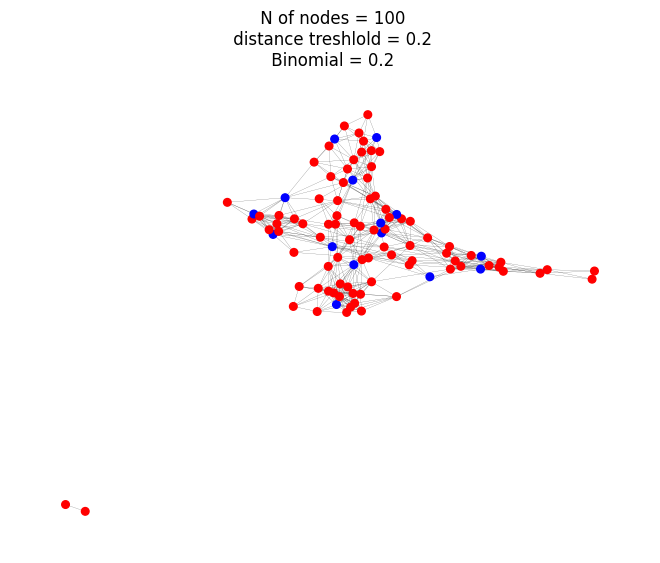

In [292]:
G, x, y, labels, color_map = random_graph(n=100, d=0.2, bin=0.2)

In [293]:
labels

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

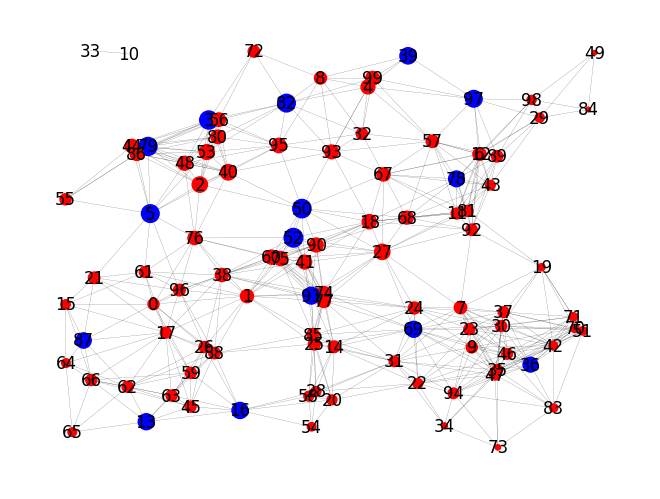

In [294]:
# plot g with npm as node size
npm = []
for i in G.nodes:
    npm.append(compute_NPM(G, i, labels))
nx.draw(G, pos = {i: (x[i], y[i]) for i in range(len(x))}, with_labels = True, node_color = color_map, node_size = [i*100 for i in npm], width = 0.1)